In [57]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from targets import Target
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda


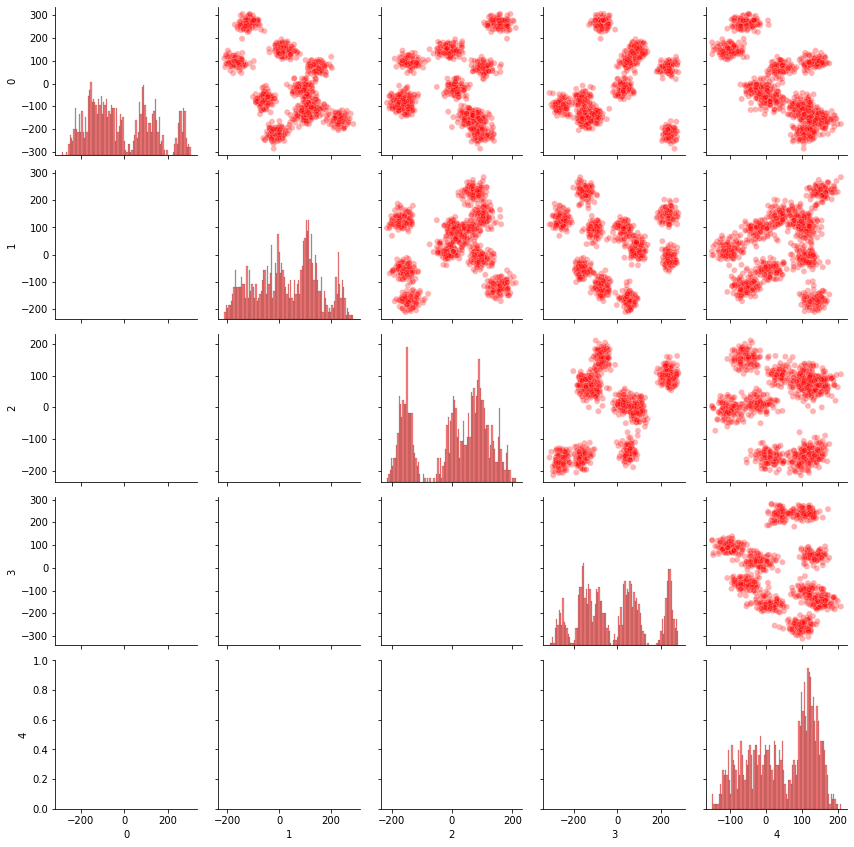

In [63]:
example = "Multimodal Dimension 128"
num_samples = 1000
target = Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()
#target_samples = target_samples.to(device)

In [64]:
import timeit

In [67]:
K_max = 50
average_sgd = []
stdev_sgd = []
average_gem = []
stdev_gem = []
average_gem2 = []
stdev_gem2 = []
for k in range(K_max-1, K_max):
    time_sgd = %timeit -o DIFDensityEstimator(target_samples,k, initial_w = SoftmaxWeight(k,p,[], mode = 'Constant')).loss(target_samples, mode = 'SGD').backward()
    average_sgd.append(time_sgd.average)
    stdev_sgd.append(time_sgd.stdev)
    time_gem = %timeit -o DIFDensityEstimator(target_samples,k, initial_w = SoftmaxWeight(k,p,[], mode = 'Constant')).loss(target_samples, mode = 'GradientEM').backward()
    average_gem.append(time_gem.average)
    stdev_gem.append(time_gem.stdev)
    time_gem2 = %timeit -o DIFDensityEstimator(target_samples,k, initial_w = SoftmaxWeight(k,p,[], mode = 'Constant')).loss(target_samples, mode = 'GradientEM2').backward()
    average_gem2.append(time_gem2.average)
    stdev_gem2.append(time_gem2.stdev)

193 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
272 ms ± 4.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
264 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


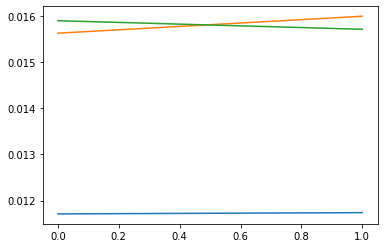

In [47]:
plt.figure()
plt.plot(range(0, K_max), average_sgd)
plt.plot(range(0, K_max), average_gem)
plt.plot(range(0, K_max), average_gem2)